In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [19]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [20]:
len(messages)

5574

In [21]:
messages[49]

"ham\tU don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak sucker. Hospitals are for weak suckers."

In [23]:
for mess_no, message in enumerate(messages[:10]):
    print (mess_no, message, '\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [24]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [29]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['ham/spam', 'messages'])

In [31]:
messages.head()

,ham/spam,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
messages.groupby('ham/spam').describe()

messages
ham/spam                                                          
ham      count                                                4825
         unique                                               4516
         top                                Sorry, I'll call later
         freq                                                   30
spam     count                                                 747
         unique                                                653
         top     Please call our customer service representativ...
         freq                                                    4

In [34]:
messages['length'] = messages['messages'].apply(len)

In [35]:
messages.head()

,ham/spam,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

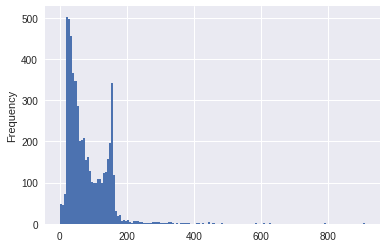

In [40]:
messages['length'].plot.hist(bins=150)

In [41]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [45]:
messages[messages['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b6b057d3d30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x2b6b05abbeb8>], dtype=object)

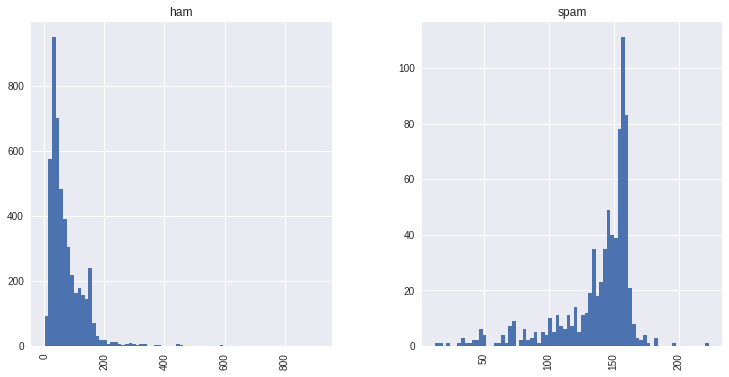

In [54]:
messages.hist(column='length', by='ham/spam', figsize=(12,6), bins=75)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b6b05ad5160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x2b6b05ddf0f0>], dtype=object)

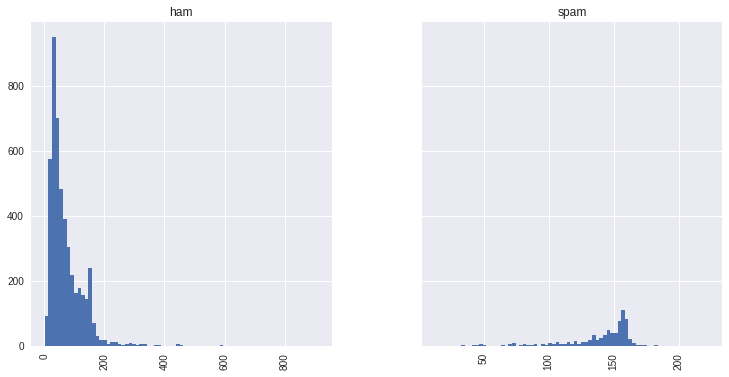

In [55]:
messages.hist(column='length', by='ham/spam', figsize=(12,6), bins=75,sharey=True)

In [56]:
import string

In [69]:
mess = "Sample text. Notice: homie! there isn't no punctuation"

In [70]:
no_punc = [c for c in mess if c not in string.punctuation]

In [72]:
no_punc[:20]

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'h']

In [73]:
from nltk.corpus import stopwords

In [74]:
stopwords.words('english')[:14]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he']

In [75]:
no_punc=''.join(no_punc)

In [76]:
no_punc

'Sample text Notice homie there isnt no punctuation'

In [77]:
"+".join(['a','b','c'])

'a+b+c'

In [85]:
clean = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [86]:
clean

['Sample', 'text', 'Notice', 'homie', 'isnt', 'punctuation']

In [89]:
def text_process(mess):
    """
    1. Remove punc
    2. Remove stopwords
    """
    no_punc = [char for char in mess if char not in string.punctuation]
    
    no_punc = "".join(no_punc)
    
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [90]:
mess

"Sample text. Notice: homie! there isn't no punctuation"

In [91]:
text_process(mess)

['Sample', 'text', 'Notice', 'homie', 'isnt', 'punctuation']

In [92]:
messages['Tokenized'] = messages['messages'].apply(text_process)

In [93]:
messages.head()

,ham/spam,messages,length,Tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['messages'])

In [96]:
print(len(bow_transformer.vocabulary_))

11425


In [98]:
mess4 = messages['messages'][3]
mess4

'U dun say so early hor... U c already then say...'

In [100]:
bow4 = bow_transformer.transform([mess4])

In [105]:
print (bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [108]:
bow4.shape

(1, 11425)

In [110]:
bow_transformer.get_feature_names()[9554]

'say'

In [111]:
bow_messages = bow_transformer.transform(messages['messages'])

In [112]:
print('Shape of the sparse matrix: ', bow_messages.shape)

Shape of the sparse matrix:  (5572, 11425)


In [114]:
bow_messages.nnz

50548

In [116]:
sparsity = (100.0 * bow_messages.nnz / (bow_messages.shape[0] * bow_messages.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [120]:
from sklearn.feature_extraction.text import TfidfTransformer
my_tfidf = TfidfTransformer().fit(bow_messages)

In [121]:
tfidf4= my_tfidf.transform(bow4)

In [122]:
print (tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [126]:
my_tfidf.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [127]:
messages_tfidf = my_tfidf.transform(bow_messages)

In [128]:
from sklearn.naive_bayes import MultinomialNB

In [130]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['ham/spam'])

In [144]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [153]:
pred = spam_detect_model.predict(messages_tfidf)
print(pred)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [154]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(messages['ham/spam'], pred))
print(confusion_matrix(messages['ham/spam'], pred))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572

[[4825    0]
 [ 115  632]]


In [152]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['messages'], messages['ham/spam'], test_size=0.2)

In [155]:
from sklearn.pipeline import Pipeline

In [156]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [157]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x2b6b05a20598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [158]:
pred2 = pipeline.predict(msg_test)

In [164]:
print(classification_report(label_test, pred2))
print(confusion_matrix(label_test, pred2))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98       959
       spam       1.00      0.70      0.82       156

avg / total       0.96      0.96      0.95      1115

[[959   0]
 [ 47 109]]
